# Time Series Prediction in TensorFlow
Problem Statement:

Predict the daily closing price of a stock using historical data.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load stock price data
data = pd.read_csv(r'C:\Users\admin\Downloads\archive (4)\AAPL.csv')  
prices = data['Close'].values

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices.reshape(-1, 1))

In [4]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # Use past 60 days to predict the next day
X, y = create_sequences(prices_scaled, seq_length)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense

# Assuming your input data has shape (samples, timesteps, features)
timesteps = 10
features = 1

model = Sequential([
    Input(shape=(timesteps, features)), # Add this Input layer
    LSTM(units=50),                     # No need for input_shape here anymore
    Dense(1)
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Reshape input data
X_train = X_train.reshape((X_train.shape[0], seq_length, 1))
X_test = X_test.reshape((X_test.shape[0], seq_length, 1))

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 1.4983e-04 - val_loss: 7.6531e-04
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 2.8421e-06 - val_loss: 3.9363e-04
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 2.7461e-06 - val_loss: 3.9762e-04
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 2.4857e-06 - val_loss: 4.2822e-04
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 2.4183e-06 - val_loss: 7.1392e-04
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 2.4041e-06 - val_loss: 5.4065e-04
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 2.5348e-06 - val_loss: 2.7609e-04
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 2.2366e-06 - val_loss: 5.2152e-04
Epoch 9/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 2.3126e-06 - val_loss: 3.9592e-04
Epoch 10/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 1.7644e-06 - val_loss: 3.3247e-04
Epoch 11/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/

In [9]:
# Predict on test data
predictions = model.predict(X_test)

# Inverse transform to get actual prices
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


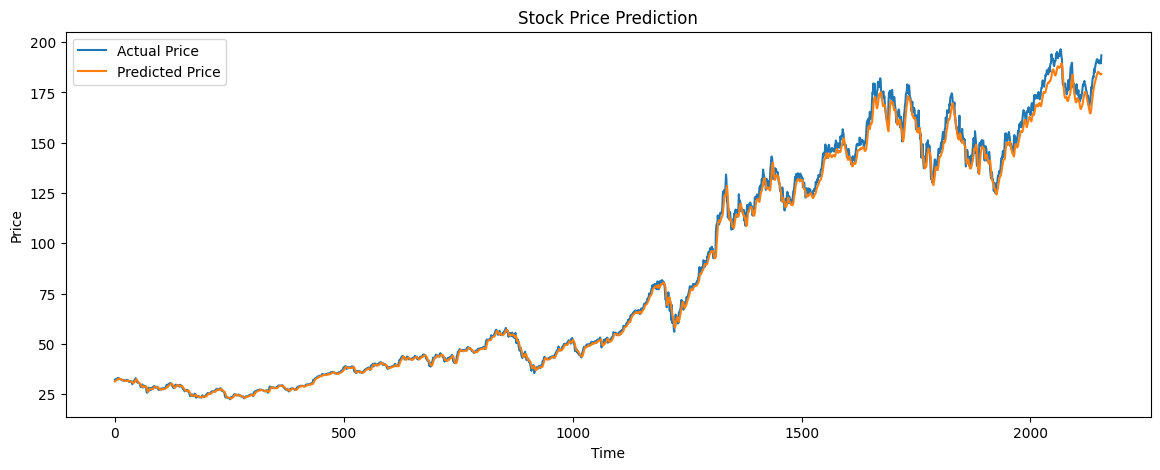

In [10]:
plt.figure(figsize=(14, 5))
plt.plot(y_test_inverse, label='Actual Price')
plt.plot(predictions_inverse, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

Evaluating Model Performance
Metrics:

Mean Squared Error (MSE): Measures average squared difference between predicted and actual values.
Root Mean Squared Error (RMSE): Square root of MSE, provides error in original units.
Mean Absolute Error (MAE): Average absolute difference.

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_inverse, predictions_inverse)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inverse, predictions_inverse)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

MSE: 10.4833
RMSE: 3.2378
MAE: 2.0962
